In [11]:
import pandas as pd
import requests, json
import seaborn
import folium
import matplotlib.pyplot as plt
import datetime

In [4]:
#documentation can be found here https://docs.spacexdata.com/?version=latest#9f1dfdc0-fbe8-4ae5-9209-7f3d649a627c
base_url = 'https://api.spacexdata.com/v3/'

In [79]:
# Info
response_info = requests.get(base_url+'info')
r_info = json.loads(response_info.text)
print(r_info)
print('Founder is {}, CEO is {}, CTO is {}'.format(r_info['founder'], r_info['ceo'], r_info['cto']))
print('SpaceX was founded in {} with {} employees and {} valuation'.format(r_info['founded'],r_info['employees'],r_info['valuation']))
print('There are {} vehicles, {} launch_sites and {} test sites'.format(r_info['vehicles'], r_info['launch_sites'], r_info['test_sites']))
print(r_info['summary'])

{'name': 'SpaceX', 'founder': 'Elon Musk', 'founded': 2002, 'employees': 7000, 'vehicles': 3, 'launch_sites': 3, 'test_sites': 1, 'ceo': 'Elon Musk', 'cto': 'Elon Musk', 'coo': 'Gwynne Shotwell', 'cto_propulsion': 'Tom Mueller', 'valuation': 27500000000, 'headquarters': {'address': 'Rocket Road', 'city': 'Hawthorne', 'state': 'California'}, 'links': {'website': 'https://www.spacex.com/', 'flickr': 'https://www.flickr.com/photos/spacex/', 'twitter': 'https://twitter.com/SpaceX', 'elon_twitter': 'https://twitter.com/elonmusk'}, 'summary': 'SpaceX designs, manufactures and launches advanced rockets and spacecraft. The company was founded in 2002 to revolutionize space technology, with the ultimate goal of enabling people to live on other planets.'}
Founder is Elon Musk, CEO is Elon Musk, CTO is Elon Musk
SpaceX was founded in 2002 with 7000 employees and 27500000000 valuation
There are 3 vehicles, 3 launch_sites and 1 test sites
SpaceX designs, manufactures and launches advanced rockets a

In [81]:
# History API
response = requests.get(base_url+'history')
r = json.loads(response.text)

In [82]:
print(len(r))
print(r[0])
print(r)

20
{'id': 1, 'title': 'Falcon 1 Makes History', 'event_date_utc': '2008-09-28T23:15:00Z', 'event_date_unix': 1222643700, 'flight_number': 4, 'details': 'Falcon 1 becomes the first privately developed liquid fuel rocket to reach Earth orbit.', 'links': {'reddit': None, 'article': 'http://www.spacex.com/news/2013/02/11/flight-4-launch-update-0', 'wikipedia': 'https://en.wikipedia.org/wiki/Falcon_1'}}
[{'id': 1, 'title': 'Falcon 1 Makes History', 'event_date_utc': '2008-09-28T23:15:00Z', 'event_date_unix': 1222643700, 'flight_number': 4, 'details': 'Falcon 1 becomes the first privately developed liquid fuel rocket to reach Earth orbit.', 'links': {'reddit': None, 'article': 'http://www.spacex.com/news/2013/02/11/flight-4-launch-update-0', 'wikipedia': 'https://en.wikipedia.org/wiki/Falcon_1'}}, {'id': 2, 'title': 'SpaceX Wins $1.6B CRS Contract', 'event_date_utc': '2008-12-23T01:00:00Z', 'event_date_unix': 1229994000, 'flight_number': None, 'details': 'NASA awards SpaceX $1.6B Commercial 

In [32]:
dates = []
names = []
for i in range(len(r)):
    dates.append(r[i]['event_date_utc'][0:10])
    names.append(r[i]['title'])
dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [28]:
data = pd.DataFrame({'date': date_lst, 'title': title_lst})
print(data)

          date                                       title
0   2008-09-28                      Falcon 1 Makes History
1   2008-12-23              SpaceX Wins $1.6B CRS Contract
2   2009-07-13             Falcon 1 Flight 5 Makes History
3   2010-06-04                       Falcon 9 First Flight
4   2010-12-08             Dragon Returns From Earth Orbit
5   2012-10-08         First Dragon Visit to Space Station
6   2013-10-07      Grasshopper Completes Half-Mile Flight
7   2013-12-03             First Flight of Falcon 9 to GTO
8   2014-04-18                         First Stage Landing
9   2014-05-02  Falcon 9 Reusable Test Vehicle Flies 1000M
10  2014-09-16     SpaceX Awarded Commercial Crew Contract
11  2015-01-10                         Drone Ship Landings
12  2015-05-06                              Pad Abort Test
13  2015-12-22                          First Land Landing
14  2016-04-08                           Droneship Landing
15  2017-03-30                              First Reflig

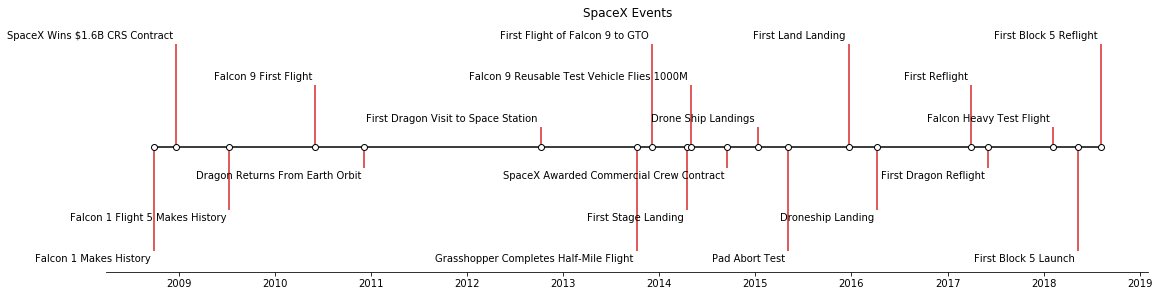

<Figure size 432x288 with 0 Axes>

In [84]:
# heavily relied on this https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/timeline.html
# Choose some nice levels -- determines length of each line
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(16, 4), constrained_layout=True)
ax.set(title="SpaceX Events")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")


# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()
plt.savefig('spacex-timeline.png')

In [46]:
# Landing pads
response_landing = requests.get(base_url+'landpads')
r_landing = json.loads(response_landing.text)

In [85]:
print(r_landing)

[{'id': 'LZ-1', 'full_name': 'Landing Zone 1', 'status': 'active', 'location': {'name': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.485833, 'longitude': -80.544444}, 'landing_type': 'RTLS', 'attempted_landings': 15, 'successful_landings': 14, 'wikipedia': 'https://en.wikipedia.org/wiki/Landing_Zones_1_and_2', 'details': "SpaceX's first east coast landing pad is Landing Zone 1, where the historic first Falcon 9 landing occurred in December 2015. LC-13 was originally used as a launch pad for early Atlas missiles and rockets from Lockheed Martin. LC-1 was later expanded to include Landing Zone 2 for side booster RTLS Falcon Heavy missions, and it was first used in February 2018 for that purpose."}, {'id': 'LZ-2', 'full_name': 'Landing Zone 2', 'status': 'active', 'location': {'name': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.485833, 'longitude': -80.544444}, 'landing_type': 'RTLS', 'attempted_landings': 3, 'successful_landings': 3, 'wikipedia': 'https://en.wikipedia.

In [66]:
landing = []
for i in range(len(r_landing)):
    dct = {}
    dct['id']=r_landing[i]['id']
    dct['full_name'] = r_landing[i]['full_name']
    dct['name']= r_landing[i]['location']['name']
    dct['lat']= r_landing[i]['location']['latitude']
    dct['long']= r_landing[i]['location']['longitude']
    dct['attempted_landing']= r_landing[i]['attempted_landings']
    dct['successful_landings']= r_landing[i]['successful_landings']
    landing.append(dct)
print(landing)
print('There are {} landing pads'.format(len(landing)))

[{'id': 'LZ-1', 'full_name': 'Landing Zone 1', 'name': 'Cape Canaveral', 'lat': 28.485833, 'long': -80.544444, 'attempted_landing': 15, 'successful_landings': 14}, {'id': 'LZ-2', 'full_name': 'Landing Zone 2', 'name': 'Cape Canaveral', 'lat': 28.485833, 'long': -80.544444, 'attempted_landing': 3, 'successful_landings': 3}, {'id': 'LZ-4', 'full_name': 'Landing Zone 4', 'name': 'Vandenberg Air Force Base', 'lat': 34.632989, 'long': -120.615167, 'attempted_landing': 2, 'successful_landings': 2}, {'id': 'OCISLY', 'full_name': 'Of Course I Still Love You', 'name': 'Port Canaveral', 'lat': 28.4104, 'long': -80.6188, 'attempted_landing': 31, 'successful_landings': 25}, {'id': 'JRTI-1', 'full_name': 'Just Read The Instructions V1', 'name': 'Port Canaveral', 'lat': 28.4104, 'long': -80.6188, 'attempted_landing': 2, 'successful_landings': 0}, {'id': 'JRTI', 'full_name': 'Just Read The Instructions', 'name': 'Port of Los Angeles', 'lat': 33.7291858, 'long': -118.262015, 'attempted_landing': 8, 's

In [65]:
# plot all 7 landing pads; set location to the center of the US
m = folium.Map(location = [39.8282,-98.5795], zoom_start = 5)
# add markers
for i in range(len(landing)):
    print(landing[i]['lat'],landing[i]['long'])
    folium.Marker([landing[i]['lat'],landing[i]['long']], popup = landing[i]['name']).add_to(m)
m.save('map_of_landing_pads.html')

28.485833 -80.544444
28.485833 -80.544444
34.632989 -120.615167
28.4104 -80.6188
28.4104 -80.6188
33.7291858 -118.262015
28.4104 -80.6188


In [71]:
landing_df = pd.DataFrame(landing)
landing_df['unsuccessful_landings']=landing_df['attempted_landing']-landing_df['successful_landings']
landing_df.head(7)

,id,full_name,name,lat,long,attempted_landing,successful_landings,unsuccessful_landings
0,LZ-1,Landing Zone 1,Cape Canaveral,28.485833,-80.544444,15,14,1
1,LZ-2,Landing Zone 2,Cape Canaveral,28.485833,-80.544444,3,3,0
2,LZ-4,Landing Zone 4,Vandenberg Air Force Base,34.632989,-120.615167,2,2,0
3,OCISLY,Of Course I Still Love You,Port Canaveral,28.410400,-80.618800,31,25,6
4,JRTI-1,Just Read The Instructions V1,Port Canaveral,28.410400,-80.618800,2,0,2
5,JRTI,Just Read The Instructions,Port of Los Angeles,33.729186,-118.262015,8,7,1
6,ASOG,A Shortfall of Gravitas,Port Canaveral,28.410400,-80.618800,0,0,0


Text(0.5, 1.0, 'Successful and Unsuccessful SpaceX Landings \n by Landing Pad')

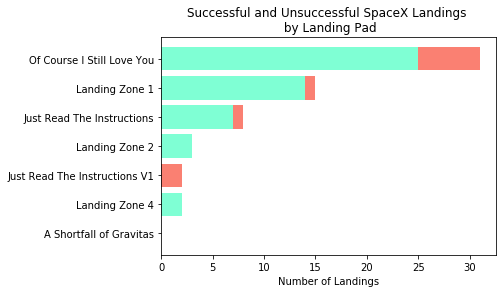

In [78]:
landing_df = landing_df.sort_values('attempted_landing')
plt.barh(landing_df['full_name'], landing_df['successful_landings'], color = 'aquamarine')
plt.barh(landing_df['full_name'], landing_df['unsuccessful_landings'], left=landing_df['successful_landings'], color = 'salmon')
plt.xlabel("Number of Landings")
plt.title('Successful and Unsuccessful SpaceX Landings \n by Landing Pad')